1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution
of age with respect to each gender along with the information about whether they survived
or not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics.

boxplot
barplot
swarmplot
violinplot
stripplot
facetgrid


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [100]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [101]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [102]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [104]:
df['age'] = df['age'].fillna(df['age'].mean())
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df['embarked'] = df['embarked'].fillna('X')
df = df.dropna()
df = df.reset_index()
df = df.drop(['index'],axis = 1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
885,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
887,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [105]:
numericals = [col for col in df if((str(df[col].dtype) =='float64') or (str(df[col].dtype) =='int64')) and (col not in ['parch','pclass','survived','sibsp'])]
df_nums = df[numericals]
df_nums

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
884,27.000000,13.0000
885,19.000000,30.0000
886,29.699118,23.4500
887,26.000000,30.0000


In [106]:
Q1 = df_nums.quantile(0.25)
Q3 = df_nums.quantile(0.75)
IQR = Q3-Q1
IQR

age     13.0000
fare    23.1042
dtype: float64

In [107]:
((df_nums <= Q1-(1.5*IQR)) | (df_nums >= Q3+(1.5*IQR))).sum()

age      65
fare    114
dtype: int64

In [108]:
outliers_index = []
for i in range(len(df)):
    if (df['age'].iloc[i] <= (Q1['age'] - (1.5*IQR['age']))) or (df['age'].iloc[i] >= (Q3['age'] + (1.5*IQR['age']))):
        outliers_index.append(i)
    elif (df['fare'].iloc[i] <= (Q1['fare'] - (1.5*IQR['fare']))) or (df['fare'].iloc[i] >= (Q3['fare'] + (1.5*IQR['fare']))):
        outliers_index.append(i)
outliers_index


[1,
 7,
 11,
 15,
 16,
 27,
 31,
 33,
 34,
 52,
 54,
 61,
 71,
 77,
 87,
 93,
 95,
 101,
 115,
 117,
 118,
 119,
 123,
 138,
 150,
 151,
 158,
 163,
 169,
 171,
 173,
 179,
 182,
 194,
 200,
 204,
 214,
 217,
 223,
 229,
 231,
 244,
 251,
 255,
 256,
 257,
 261,
 267,
 268,
 274,
 279,
 289,
 290,
 296,
 298,
 304,
 305,
 306,
 309,
 310,
 317,
 318,
 323,
 324,
 325,
 331,
 333,
 335,
 336,
 339,
 340,
 365,
 368,
 372,
 374,
 376,
 379,
 380,
 384,
 385,
 389,
 392,
 411,
 434,
 437,
 444,
 452,
 455,
 466,
 468,
 478,
 482,
 483,
 485,
 486,
 491,
 492,
 495,
 497,
 503,
 504,
 519,
 526,
 529,
 536,
 539,
 543,
 544,
 549,
 554,
 556,
 557,
 569,
 580,
 584,
 586,
 590,
 608,
 624,
 625,
 626,
 629,
 640,
 641,
 643,
 644,
 646,
 654,
 658,
 659,
 664,
 671,
 678,
 680,
 683,
 688,
 693,
 697,
 699,
 707,
 715,
 729,
 736,
 740,
 741,
 744,
 754,
 758,
 762,
 764,
 771,
 778,
 787,
 788,
 791,
 801,
 802,
 819,
 823,
 826,
 829,
 833,
 844,
 847,
 849,
 854,
 861,
 877]

In [109]:
df = df.drop(list(set(outliers_index)),axis = 0)
df = df.reset_index()
df = df.drop('index',axis = 1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
2,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
4,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
717,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
718,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
719,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


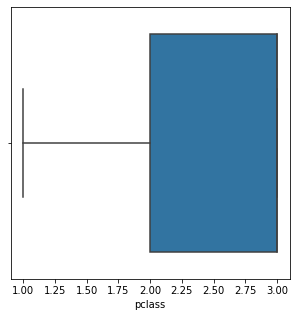

In [110]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x=df["pclass"])
plt.show()


In [114]:
outliers_index = []
for i in range(len(df)):
    if (df['age'].iloc[i] <= (Q1['age'] - (1.5*IQR['age']))) or (df['age'].iloc[i] >= (Q3['age'] + (1.5*IQR['age']))):
        outliers_index.append(i)
    elif (df['fare'].iloc[i] <= (Q1['fare'] - (1.5*IQR['fare']))) or (df['fare'].iloc[i] >= (Q3['fare'] + (1.5*IQR['fare']))):
        outliers_index.append(i)
outliers_index
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
2,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
4,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
717,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
718,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
719,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


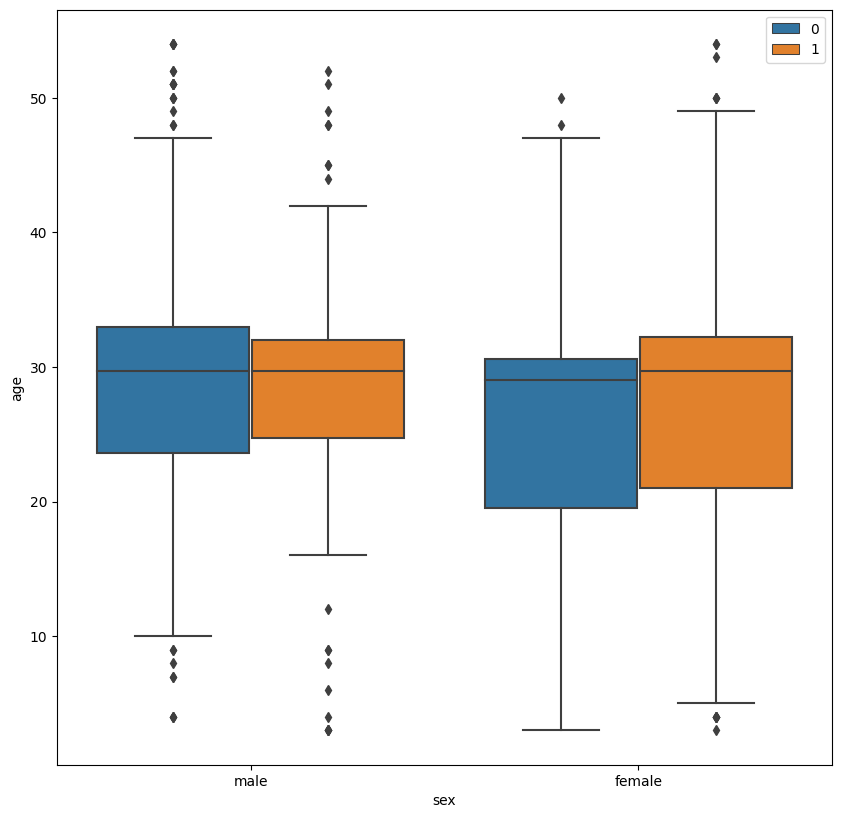

In [115]:
plt.figure(figsize=(10,10),dpi = 100)
ax = sns.boxplot(data = df,x = 'sex',y = 'age',hue = 'survived')
plt.legend()
plt.show()